In this example, we illustrate the use of the **acf_matrix** module, which can take data and computes its ACF and the FT of the ACF.

In [1]:
import os
import sys
import math
import copy

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import units
from libra_py import influence_spectrum


import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<in

Lets create the data with the known properties. In particular, we assume the data evolves with 3 frequencies: 500, 850, and 1400 cm^{-1}. Ideally, we should be able to see these frequencies in the FT of the ACF.

The 1000 data points is generated with the time distance between each one of 1 fs. 

In [2]:
# Test case: 3 frequences
data = []
dt = 1.0 * units.fs2au
dw = 1.0 * units.inv_cm2Ha
w1 = 500.0 * units.inv_cm2Ha
w2 = 1400.0 * units.inv_cm2Ha
w3 = 850.0 * units.inv_cm2Ha
wspan = 2000.0 * units.inv_cm2Ha

for it in xrange(1000):
    t = it * dt
    d = MATRIX(3,1)
    d.set(0, 0, math.sin(w1*t) )
    d.set(1, 0, math.cos(w2*t) )
    d.set(2, 0, math.sin(w3*t) )
    data.append( d )

Now, lets run the pre-defined function *recipe1* on this data. Note that in this analysis we should use the dt consistent with that used in data generation (1 fs)

We look only for frequencies in the range of 0 - 2000 cm^{-1} and the frequencies grid will be of 1 cm^{-1}

In [3]:
T, ACF, uACF, W, J, J2 = influence_spectrum.recipe1(data, {})

Use the default value =  True
Use the default value =  0
Use the default value =  spectrum.txt
Use the default value =  False
Use the default value =  1.0
Use the default value =  1.0
Use the default value =  acf.txt
Use the default value =  3000.0
Use the default value =  0


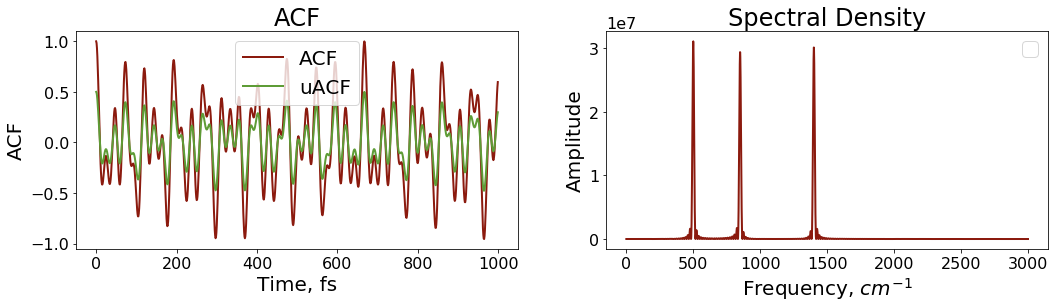

In [4]:
plt.figure(1, figsize=(18, 4)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('ACF')
plt.xlabel('Time, fs')
plt.ylabel('ACF')
plt.plot(T, ACF, label='ACF', linewidth=2, color = colors["11"]) 
plt.plot(T, uACF, label='uACF', linewidth=2, color = colors["21"]) 
plt.legend()

plt.subplot(1,2,2)
plt.title('Spectral Density')
plt.xlabel('Frequency, $cm^{-1}$')
plt.ylabel('Amplitude')
plt.plot(W, J2, label='', linewidth=2, color = colors["11"]) 
plt.legend()

plt.show()
plt.close()

Alternatively, we can run the function with full set of parameters:

* do_output=False              # whether we want to generate the files for plotting, no, we don't
* acf_filename="acf.txt"       # this is where ACF data would be printed out
* spectrum_filename="spectrum.txt" # this is where FT data would be printed out
* do_center=True               # whether we are looking at the fluctuation of the data - yes, but you can also try no
* opt=0                        # this is the selector of the ACF convention, 0 is the chemical convention for ACF, 1 - is the convention for statisticians. You can also give it a try.

In [5]:
params = {"acf_type":1}

T, ACF, uACF, W, J, J2 = influence_spectrum.recipe1(data, params)

Use the default value =  True
Use the default value =  0
Use the default value =  spectrum.txt
Use the default value =  False
Use the default value =  1.0
Use the default value =  1.0
Use the default value =  acf.txt
Use the default value =  3000.0


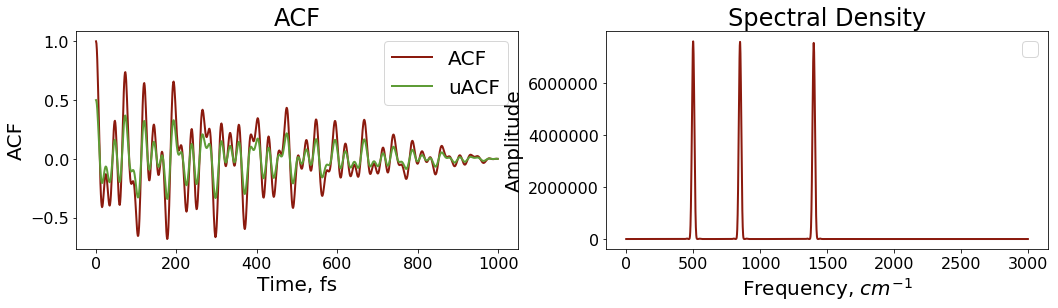

In [6]:
plt.figure(1, figsize=(18, 4)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('ACF')
plt.xlabel('Time, fs')
plt.ylabel('ACF')
plt.plot(T, ACF, label='ACF', linewidth=2, color = colors["11"]) 
plt.plot(T, uACF, label='uACF', linewidth=2, color = colors["21"]) 
plt.legend()

plt.subplot(1,2,2)
plt.title('Spectral Density')
plt.xlabel('Frequency, $cm^{-1}$')
plt.ylabel('Amplitude')
plt.plot(W, J2, label='', linewidth=2, color = colors["11"]) 
plt.legend()

plt.show()
plt.close()

Below, we use the same procedure for analysis, but a different format to store our data

In [7]:
# Test case: 3 frequences
data = []
dt = 1.0 * units.fs2au
dw = 1.0 * units.inv_cm2Ha
w1 = 500.0 * units.inv_cm2Ha
w2 = 1400.0 * units.inv_cm2Ha
w3 = 850.0 * units.inv_cm2Ha
wspan = 2000.0 * units.inv_cm2Ha

for it in xrange(1000):
    t = it * dt
    d = MATRIX(1,1)
    d.set(0, 0, math.sin(w1*t) + 1.0*math.cos(w2*t) + 1.0*math.sin(w3*t) )    
    data.append( d )
    
T, ACF, uACF, W, J, J2 = influence_spectrum.recipe1(data, {"data_type":0})

Use the default value =  True
Use the default value =  spectrum.txt
Use the default value =  False
Use the default value =  1.0
Use the default value =  1.0
Use the default value =  acf.txt
Use the default value =  3000.0
Use the default value =  0


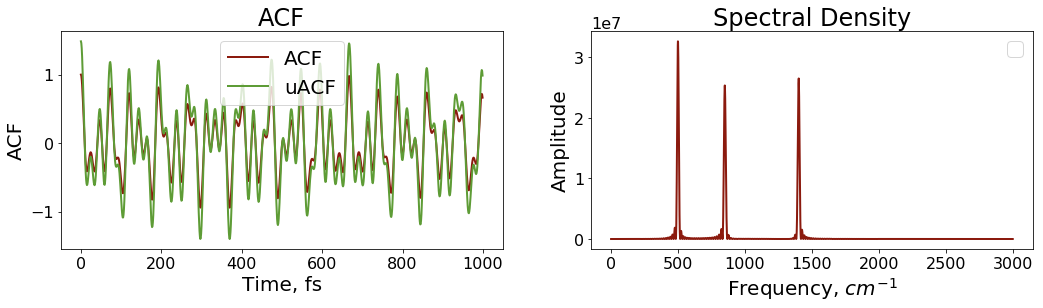

In [8]:
plt.figure(1, figsize=(18, 4)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('ACF')
plt.xlabel('Time, fs')
plt.ylabel('ACF')
plt.plot(T, ACF, label='ACF', linewidth=2, color = colors["11"]) 
plt.plot(T, uACF, label='uACF', linewidth=2, color = colors["21"]) 
plt.legend()

plt.subplot(1,2,2)
plt.title('Spectral Density')
plt.xlabel('Frequency, $cm^{-1}$')
plt.ylabel('Amplitude')
plt.plot(W, J2, label='', linewidth=2, color = colors["11"]) 
plt.legend()

plt.show()
plt.close()

And another example - test ACF based on the VECTOR data series

In [9]:
# Test case: 3 frequences
data = []
dt = 1.0 * units.fs2au
dw = 1.0 * units.inv_cm2Ha
w1 = 500.0 * units.inv_cm2Ha
w2 = 1400.0 * units.inv_cm2Ha
w3 = 850.0 * units.inv_cm2Ha
wspan = 2000.0 * units.inv_cm2Ha

for it in xrange(1000):
    t = it * dt
    d = VECTOR(math.sin(w1*t), 1.0*math.cos(w2*t), 1.0*math.sin(w3*t))    
    data.append( d )
    
T, ACF, uACF, W, J, J2 = influence_spectrum.recipe1(data, {"data_type":1})

Use the default value =  True
Use the default value =  spectrum.txt
Use the default value =  False
Use the default value =  1.0
Use the default value =  1.0
Use the default value =  acf.txt
Use the default value =  3000.0
Use the default value =  0


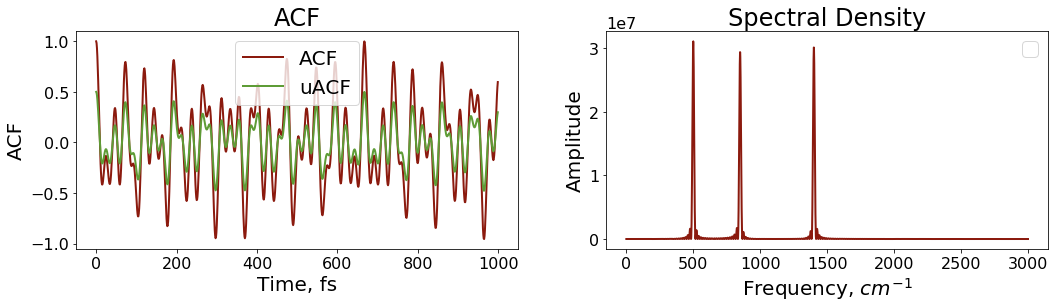

In [10]:
plt.figure(1, figsize=(18, 4)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('ACF')
plt.xlabel('Time, fs')
plt.ylabel('ACF')
plt.plot(T, ACF, label='ACF', linewidth=2, color = colors["11"]) 
plt.plot(T, uACF, label='uACF', linewidth=2, color = colors["21"]) 
plt.legend()

plt.subplot(1,2,2)
plt.title('Spectral Density')
plt.xlabel('Frequency, $cm^{-1}$')
plt.ylabel('Amplitude')
plt.plot(W, J2, label='', linewidth=2, color = colors["11"]) 
plt.legend()

plt.show()
plt.close()